In [14]:
import os

In [15]:
from dotenv import load_dotenv
load_dotenv()

True

In [16]:
GOOGLE_API_KEY = os.getenv("GOOGLE_API_KEY")
os.environ['GOOGLE_API_KEY'] = GOOGLE_API_KEY

### Simple Workflow with graph

In [17]:
def function1(input1):
    return input1 + " from first function"

def function2(input2):
    return input2 + " Shoaib from second function"

In [18]:
from langgraph.graph import Graph

In [19]:
workflow1 = Graph()

In [20]:
workflow1.add_node("function1", function1)
workflow1.add_node("function2", function2)

In [21]:
workflow1.set_entry_point("function1")
workflow1.set_finish_point("function2")

In [22]:
workflow1.add_edge("function1", "function2")

In [23]:
app1 = workflow1.compile()

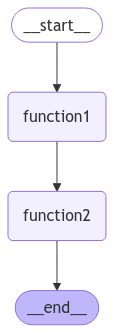

In [24]:
from IPython.display import display, Image
try:
    display(Image(app1.get_graph().draw_mermaid_png()))
except Exception as e:
    print(e)

In [25]:
app1.invoke("Hi I am Mohammad")

'Hi I am Mohammad from first function Shoaib from second function'

In [26]:
input = "Hi I am Mohammad"

In [27]:
for output in app1.stream(input):
    for key,value in output.items():
        print(f"here is output from {key}")
        print("___________")
        print(value)
        print("\n")

here is output from function1
___________
Hi I am Mohammad from first function


here is output from function2
___________
Hi I am Mohammad from first function Shoaib from second function




### Workflow with LLM

In [28]:
from langchain_google_genai import ChatGoogleGenerativeAI
llm = ChatGoogleGenerativeAI(model = 'gemini-1.0-pro')

In [29]:
llm.invoke("Hi")

AIMessage(content='Hello there! How can I assist you today?', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': [{'category': 'HARM_CATEGORY_SEXUALLY_EXPLICIT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HATE_SPEECH', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HARASSMENT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_DANGEROUS_CONTENT', 'probability': 'NEGLIGIBLE', 'blocked': False}]}, id='run-1359db03-0b4b-4d69-8b65-f51ca309bcc9-0', usage_metadata={'input_tokens': 2, 'output_tokens': 10, 'total_tokens': 12, 'input_token_details': {'cache_read': 0}})

In [30]:
def function1(input):
    llm = ChatGoogleGenerativeAI(model = 'gemini-1.0-pro')
    response = llm.invoke(input).content
    return response

In [31]:
def function2(input):
    upper_case = input.upper()
    return upper_case

In [32]:
from langgraph.graph import Graph
workflow2 = Graph()

In [33]:
workflow2.add_node("LLM",function1)
workflow2.add_node("upper_string",function2)

In [34]:
workflow2.add_edge("LLM","upper_string")

In [35]:
workflow2.set_entry_point("LLM")
workflow2.set_finish_point("upper_string")

In [36]:
app2 = workflow2.compile()

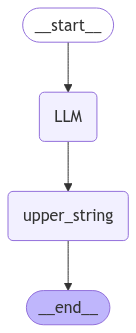

In [37]:
from IPython.display import display, Image
try:
    display(Image(app2.get_graph().draw_mermaid_png()))
except Exception as e:
    print(e)

In [38]:
app2.invoke("Who is the First prime minister of India and where was his/her hometown?")

'**JAWAHARLAL NEHRU**\n\n**HOMETOWN:** ALLAHABAD, UTTAR PRADESH, INDIA'

In [41]:
input = "Who is the First prime minister of India and where was his/her hometown?"

In [42]:
for output in app2.stream(input):
    for key,value in output.items():
        print(f"here is output from {key}")
        print("___________")
        print(value)
        print("\n")

here is output from LLM
___________
**Jawaharlal Nehru**

**Hometown:** Allahabad, Uttar Pradesh


here is output from upper_string
___________
**JAWAHARLAL NEHRU**

**HOMETOWN:** ALLAHABAD, UTTAR PRADESH




### Workflow with LLM and TokenCounter function

In [43]:
def function3(input):
    token = input.split()
    token_number = len(token)
    token_number = f"total token count is  {token_number}"
    return token_number

In [44]:
workflow3 = Graph()
workflow3.add_node("LLM",function1)
workflow3.add_node("token_count",function3)

In [45]:
workflow3.add_edge("LLM","token_count")
workflow3.set_entry_point("LLM")
workflow3.set_finish_point("token_count")

In [46]:
app3 = workflow3.compile()

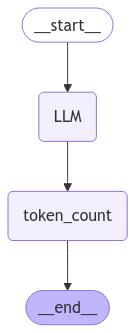

In [47]:
from IPython.display import display, Image
try:
    display(Image(app3.get_graph().draw_mermaid_png()))
except Exception as e:
    print(e)

In [48]:
input = "What is RAG explain it."
for output in app3.stream(input):
    for key,value in output.items():
        print(f"here is output from {key}")
        print("___________")
        print(value)
        print("\n")

here is output from LLM
___________
**RAG (Remote Access Gateway)**

RAG is a network security device that allows secure remote access to an organization's internal network from untrusted networks, such as the internet. It provides a single point of entry for authorized users and devices, ensuring that only authenticated and authorized traffic can access the internal network.

**Components of RAG:**

* **Authentication Server:** Verifies user credentials before granting access.
* **Authorization Server:** Determines what resources the user has access to based on their role and permissions.
* **Network Access Control (NAC) Server:** Enforces security policies on devices attempting to connect.
* **Firewall:** Blocks unauthorized traffic and enforces access rules.
* **Virtual Private Network (VPN) Server:** Establishes secure encrypted tunnels for remote access.

**Operation of RAG:**

1. A remote user attempts to access the internal network.
2. The RAG authenticates the user via the auth